# ANN

---

### 01. 퍼셉트론(Perceptron)

In [1]:
import numpy as np

In [2]:
def AND(x1, x2):
    input_x = np.array([x1, x2, 1])
    w=np.array([[0.6], [0.6], [-1]])
    res = np.matmul(input_x, w)
    if res > 0:
        return True
    else:
        return False

In [3]:
print(AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1))

False False False True


In [4]:
def OR(x1, x2):
    input_x = np.array([x1, x2, 1])
    w=np.array([[1], [1], [-0.9]])
    res = np.matmul(input_x, w)
    if res > 0:
        return True
    else:
        return False

In [5]:
print(OR(0, 0), OR(0, 1), OR(1, 0), OR(1, 1))

False True True True


---

### 02. XOR 문제 - 단층 퍼셉트론 구현하기

In [34]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [35]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [36]:
class OLP(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()).to(device)
        
    def forward(self, X):
        prediction = self.model(X)
        return prediction

In [37]:
model = OLP(device)
nb_epochs = 10000
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(nb_epochs + 1):
    h = model.forward(X)
    #print(h), print(Y)
    cost = torch.nn.functional.binary_cross_entropy(h, Y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print("{:4d}/{}\t cost: {:.6f}".format(epoch, nb_epochs, cost.item()))

   0/20000	 cost: 0.727397
1000/20000	 cost: 0.695188
2000/20000	 cost: 0.693817
3000/20000	 cost: 0.693379
4000/20000	 cost: 0.693232
5000/20000	 cost: 0.693180
6000/20000	 cost: 0.693160
7000/20000	 cost: 0.693153
8000/20000	 cost: 0.693150
9000/20000	 cost: 0.693148
10000/20000	 cost: 0.693148


In [38]:
with torch.no_grad():
    hypothesis = model.forward(X)
    predicted = (hypothesis > 0.5).float()
    acc = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', acc.item())

모델의 출력값(Hypothesis):  [[0.50076187]
 [0.5002598 ]
 [0.49997926]
 [0.4994772 ]]
모델의 예측값(Predicted):  [[1.]
 [1.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


---

### 03. XOR 문제 - 다층 퍼셉트론 구현하기

In [20]:
import torch
import torch.nn as nn

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [22]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 10, bias = True),
            nn.Sigmoid(),
            nn.Linear(10, 10, bias = True),
            nn.Sigmoid(),
            nn.Linear(10, 1, bias = True),
            nn.Sigmoid()).to(device)
    def forward(self, X):
        return self.model(X)

In [40]:
model = NeuralNetwork()
nb_epochs = 20000
#optimizer = torch.opitm.SGD(model.parameters(), lr = 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for epoch in range(nb_epochs + 1):
    h = model.forward(X)
    cost = nn.functional.binary_cross_entropy(h, Y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print("{:5d}/{}: \t{:6f}".format(epoch, nb_epochs, cost.item()))

    0/20000: 	0.727315
 1000/20000: 	0.023630
 2000/20000: 	0.001834
 3000/20000: 	0.000845
 4000/20000: 	0.000533
 5000/20000: 	0.000384
 6000/20000: 	0.000297
 7000/20000: 	0.000242
 8000/20000: 	0.000203
 9000/20000: 	0.000175
10000/20000: 	0.000153
11000/20000: 	0.000136
12000/20000: 	0.000122
13000/20000: 	0.000111
14000/20000: 	0.000101
15000/20000: 	0.000093
16000/20000: 	0.000086
17000/20000: 	0.000080
18000/20000: 	0.000075
19000/20000: 	0.000070
20000/20000: 	0.000066


In [41]:
with torch.no_grad():
    hypothesis = model.forward(X)
    predicted = (hypothesis > 0.5).float()
    acc = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', acc.item())

모델의 출력값(Hypothesis):  [[4.2741802e-05]
 [9.9992466e-01]
 [9.9993110e-01]
 [7.8007783e-05]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


---

### 04. 다층 퍼셉트론으로 손글씨 분류하기

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [53]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [61]:
print(digits.target[0:10])
print(digits.keys())
print(digits.target_names[0:10])
#print(digits.DESCR)

[0 1 2 3 4 5 6 7 8 9]
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]


In [50]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


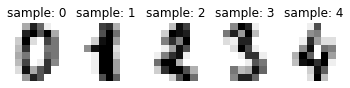

In [55]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: {}'.format(label))


In [78]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

##### 다층 퍼셉트론 분류기 만들기

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [88]:
class NNDigit(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.Sigmoid()
        )
    def forward(self, X):
        return self.model(X)

In [113]:
model = NNDigit()
nb_epochs = 100
optimizer = optim.Adam(model.parameters())

X = torch.FloatTensor(X).view(-1, 64)
Y = torch.LongTensor(Y)
for epoch in range(nb_epochs+1):
    h = model.forward(X)
    #cost = nn.CrossEntropyLoss(h, Y)
    cost = torch.nn.functional.cross_entropy(h,Y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    losses.append(csot.item())
    if epoch % 10 == 0:
        print("{:5d}/ {}: cost:{:6f}".format(epoch, nb_epochs, cost.item()))

    0/ 10000: cost:2.309320
 2000/ 10000: cost:1.462120
 4000/ 10000: cost:1.462105
 6000/ 10000: cost:1.462103
 8000/ 10000: cost:1.462101
10000/ 10000: cost:1.462100


Accuracy: 0.9988870620727539
Label:  8
Prediction:  8


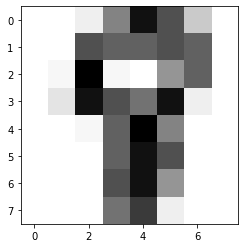

In [123]:
import random
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = X
    Y_test = Y

    prediction = model.forward(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(X_test) - 1)
    X_single_data = X_test[r:r + 1].view(-1, 64).float().to(device)
    Y_single_data = Y_test[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model.forward(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(X_test[r:r + 1].view(8,8), cmap='Greys', interpolation='nearest')
    plt.show()